In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel("US Superstore data.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

In [6]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Profit,City,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Discount,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Row ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Dropping  Row ID column and assigning to df
df=df.drop(['Row ID','Country','Postal Code'],axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df['Cost']=df['Sales']-df['Profit']
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,220.0464
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,512.3580
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.7486
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1340.6085
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,19.8516


In [9]:
df['Profit %']=(df['Profit']/df['Cost'])*100
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,Profit %
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,220.0464,19.047619
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,512.3580,42.857143
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.7486,88.679245
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,19.8516,12.676056


In [11]:
#Calculating the time taken for an order to ship and converting the no. of days in int format
df['Shipment_Duration']=(pd.to_datetime(df['Ship Date'])-pd.to_datetime(df['Order Date'])).dt.days
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,Profit %,Target,Shipment_Duration
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,220.0464,19.047619,1,3
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,512.3580,42.857143,1,3
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.7486,88.679245,1,4
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1340.6085,-28.571429,0,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,19.8516,12.676056,1,7


In [12]:
#extracting the year of order
df['order_year']=df['Order Date'].dt.year
df['order_year'].head()

0    2016
1    2016
2    2016
3    2015
4    2015
Name: order_year, dtype: int64

In [13]:
#Top 10 customers who order frequently
df_top10=df['Customer Name'].value_counts().head(10)
df_top10

William Brown          37
Paul Prost             34
Matt Abelman           34
John Lee               34
Jonathan Doherty       32
Seth Vernon            32
Edward Hooks           32
Chloris Kastensmidt    32
Zuschuss Carroll       31
Emily Phan             31
Name: Customer Name, dtype: int64

In [14]:
def agg_customer(x):
    d = []
    d.append(x['Order ID'].count())
    d.append(x['Sales'].sum())
    d.append(x['Profit %'].mean())
    d.append(pd.to_datetime(x['Order Date']).min())
    d.append(pd.to_datetime(x['Order Date']).max())
    d.append(x['Product Name'].unique())
    d.append(x['City'].unique())
    d.append(x['Shipment_Duration'].mean())
    return pd.Series(d, index=['#Purchases','Total_Sales','Average Profit % gained','First_Purchase_Date','Latest_Purchase_Date','Products_Purchased','Location_Count','Avg_delivery_time'])

In [15]:
#grouping based on Customer ID and applying the function we created above
df_agg = df.groupby('Customer Name').apply(agg_customer)
df_agg.head()

,#Purchases,Total_Sales,Average Profit % gained,First_Purchase_Date,Latest_Purchase_Date,Products_Purchased,Location_Count,Avg_delivery_time
Customer Name,,,,,,,,
Aaron Bergman,6,886.156,15.186975,2014-02-18,2016-11-10,"[Global Push Button Manager's Chair, Indigo, N...","[Seattle, Arlington, Oklahoma City]",2.166667
Aaron Hawkins,11,1744.700,51.896958,2014-04-22,2017-12-18,"[Avery Fluorescent Highlighter Four-Color Set,...","[Philadelphia, Gulfport, Los Angeles, San Fran...",3.454545
Aaron Smayling,10,3050.692,5.498078,2014-07-27,2017-10-03,[Cisco CP-7937G Unified IP Conference Station ...,"[Jacksonville, Arlington, Austin, Pasadena, Ne...",3.500000
Adam Bellavance,18,7755.620,58.640721,2015-09-18,2017-11-06,"[Sabrent 4-Port USB 2.0 Hub, Xerox 1881, Acco ...","[New York City, Concord, Waynesboro, Philadelp...",4.055556
Adam Hart,20,3250.337,34.652355,2014-11-16,2017-11-26,"[GBC DocuBind 300 Electric Binding Machine, Ne...","[New York City, Atlanta, Henderson, Huntington...",2.500000


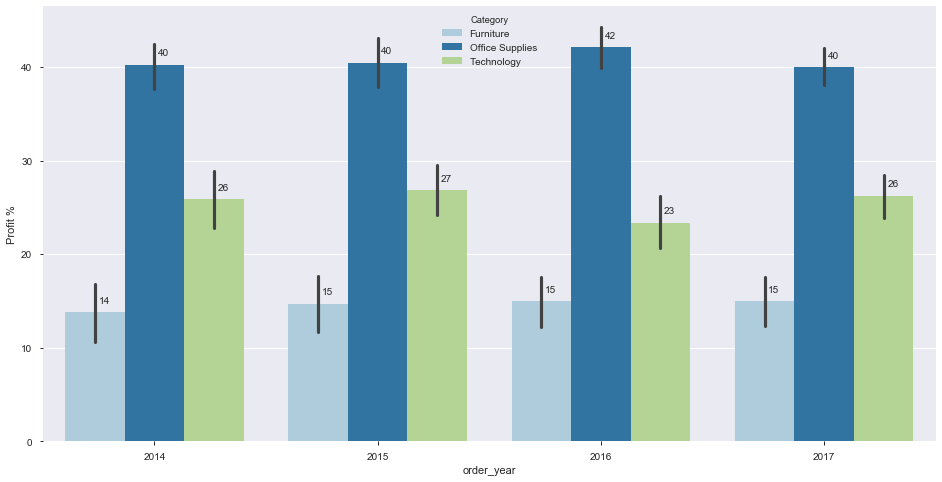

In [16]:
#Calculating Profit gained in each Category
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot('order_year','Profit %',hue='Category',palette='Paired',data=df)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()

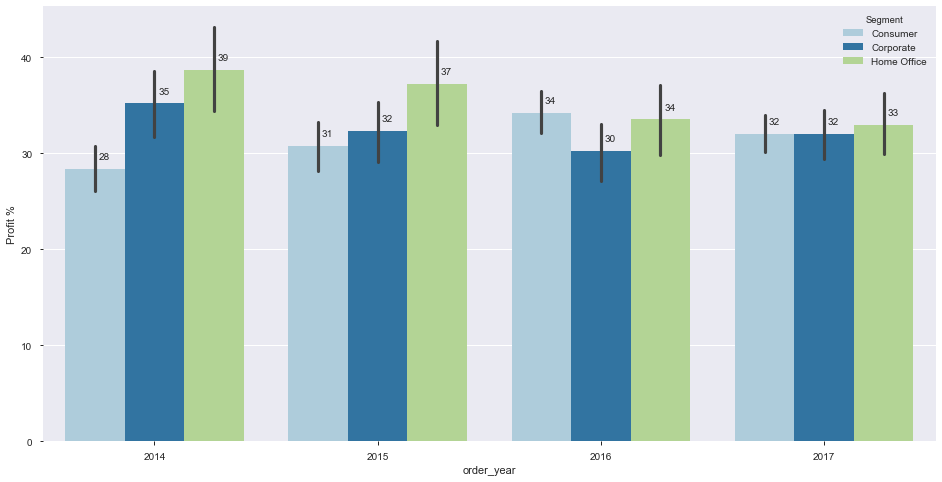

In [17]:
#Calculating Profit gained in each segment
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot('order_year','Profit %',hue='Segment',palette='Paired',data=df)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()

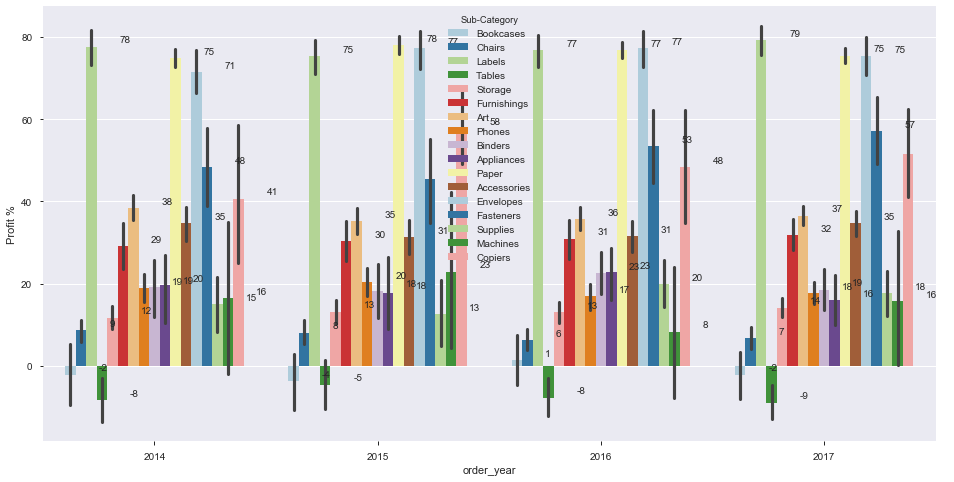

In [18]:
#Calculating Profit gained in each sub-Category
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot('order_year','Profit %',hue='Sub-Category',palette='Paired',data=df)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()

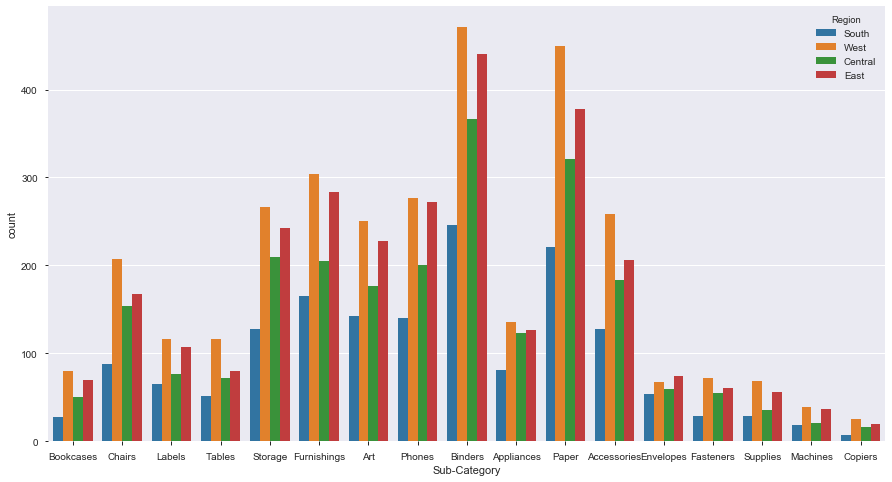

In [19]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

Text(0.5, 1.0, 'Year wise Total Sales & % of profit gained')

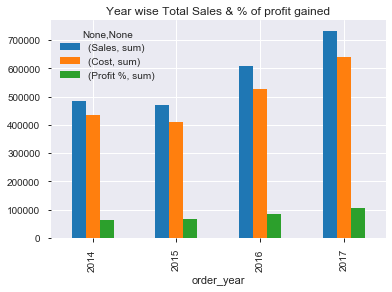

In [20]:
#Sales per year
df.groupby('order_year')['Sales','Cost','Profit %'].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales & % of profit gained')

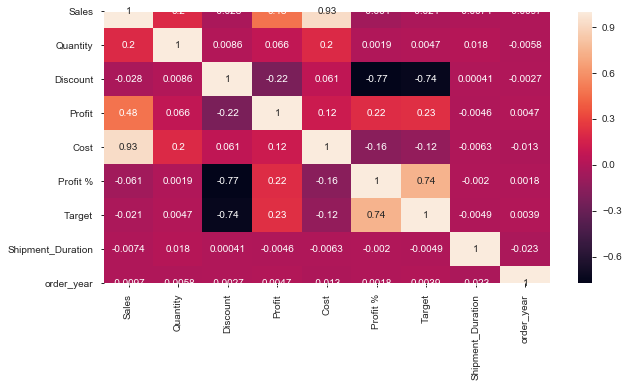

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
Order ID             9994 non-null object
Order Date           9994 non-null datetime64[ns]
Ship Date            9994 non-null datetime64[ns]
Ship Mode            9994 non-null object
Customer ID          9994 non-null object
Customer Name        9994 non-null object
Segment              9994 non-null object
City                 9994 non-null object
State                9994 non-null object
Region               9994 non-null object
Product ID           9994 non-null object
Category             9994 non-null object
Sub-Category         9994 non-null object
Product Name         9994 non-null object
Sales                9994 non-null float64
Quantity             9994 non-null int64
Discount             9994 non-null float64
Profit               9994 non-null float64
Cost                 9994 non-null float64
Profit %             9994 non-null float64
Target               9994 non-nul

##### Linear Regression

In [30]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
from sklearn.linear_model import Lasso,Ridge,LassoCV, RidgeCV
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [31]:
df2=df.copy()
a=df2.select_dtypes(include='object')
df2=df2.drop(['Order Date','Ship Date'],1)
df2=df2.drop(a,1)
df2.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Cost', 'Profit %', 'Target',
       'Shipment_Duration', 'order_year'],
      dtype='object')

In [32]:
df2.head()

,Sales,Quantity,Discount,Profit,Cost,Profit %,Target,Shipment_Duration,order_year
0,261.9600,2,0.00,41.9136,220.0464,19.047619,1,3,2016
1,731.9400,3,0.00,219.5820,512.3580,42.857143,1,3,2016
2,14.6200,2,0.00,6.8714,7.7486,88.679245,1,4,2016
3,957.5775,5,0.45,-383.0310,1340.6085,-28.571429,0,7,2015
4,22.3680,2,0.20,2.5164,19.8516,12.676056,1,7,2015


In [33]:
y=df2['Sales']
x=df2.drop('Sales',1)

In [34]:
#Backward elimination

#cols=list(x.columns) 
cols = x.columns.tolist()
pmax=1
while len(cols)>0:
    p=[]
    x_1=x[cols]
    model=sm.OLS(y,x_1).fit()
    p=pd.Series(model.pvalues.values,index=cols)
    pmax=max(p)
    feature_max_p=p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_max_p)
    else:
        break

selected_features_BE=cols
print(selected_features_BE)

['Quantity', 'Discount', 'Profit', 'Cost', 'Profit %', 'Target', 'order_year']


In [35]:
c=df2[selected_features_BE]
X_train,X_test,y_train,y_test=train_test_split(c,y,test_size=0.3) 

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

lr=LinearRegression()
model=lr.fit(X_train,y_train)

In [36]:
print("Coefficient b0-",model.coef_[0])
print("Coefficient b1-",model.coef_[1])
print("Intercept - ",model.intercept_)

Coefficient b0- -6.117442714214821e-14
Coefficient b1- -3.262991788086284e-13
Intercept -  231.98930260185844


In [37]:
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 1.0
R^2 score for test: 1.0


In [38]:
model1=sm.OLS(y,c)
result=model1.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.640e+33
Date:                Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                        10:34:38   Log-Likelihood:                      2.7292e+05
No. Observations:                9994   AIC:                                 -5.458e+05
Df Residuals:                    9987   BIC:                                 -5.458e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

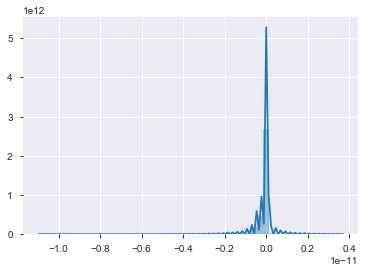

In [39]:
#Assumption - 1 Normality residuals

x_mean=np.mean(c)
y_mean=np.mean(y)
n=len(c)

residuals=result.resid
sns.distplot(residuals)
plt.show()

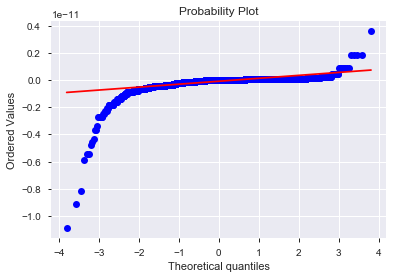

(31189447.33820571, 0.0)


In [40]:
stats.probplot(residuals, plot=plt)
plt.show()
print(stats.jarque_bera(residuals)) #jarque-bera test

In [41]:
# Asumption -2 Multi colinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(c.values,i) for i in range(c.shape[1])]
pd.DataFrame({"vif":vif},index=c.columns).T

,Quantity,Discount,Profit,Cost,Profit %,Target,order_year
vif,4.080173,4.720781,1.106642,1.255667,4.889759,13.757131,20.201221


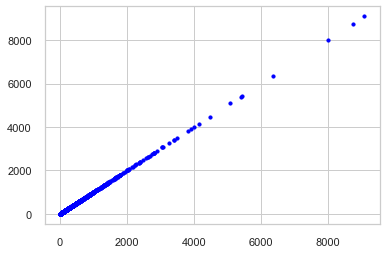

In [42]:
sns.set(style = 'whitegrid')
predictions = model.predict(X_test)
plt.scatter(lr.predict(X_test), y_test, 
            color = "blue", s = 10, label = 'Test data')

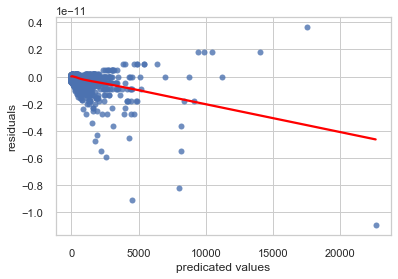

In [43]:
#Assumptions 3 constant variance of residuals

residuals=result.resid
y_pred=result.predict(c)

sns.regplot(x=y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
plt.xlabel('predicated values')
plt.ylabel('residuals')
plt.show()

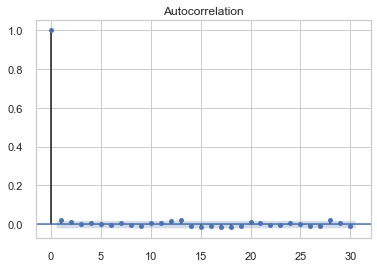

In [44]:
# Assumption 4 - Auto correlation

import statsmodels.tsa.api as smt
acf=smt.graphics.plot_acf(residuals,lags=30)
acf.show()

In [45]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
tech= df.loc[df['Category'] == 'Technology']
furniture.shape, office.shape,tech.shape

((2121, 23), (6026, 23), (1847, 23))

In [46]:
selected_features_BE

['Quantity', 'Discount', 'Profit', 'Cost', 'Profit %', 'Target', 'order_year']

In [47]:
cols = ['Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID','Segment','State', 'Customer Name', 'City',
       'Region', 'Product ID','Category','Product Name',  'Sub-Category',
        'Discount']

furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
tech.drop(cols, axis=1, inplace=True)

In [48]:
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
tech = tech.sort_values('Order Date')

furniture = furniture.groupby('Order Date').sum().reset_index()
office = office.groupby('Order Date').sum().reset_index()
tech = tech.groupby('Order Date').sum().reset_index()


furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
tech = tech.set_index('Order Date')

a=['Sales','Cost', 'Profit %', 'Shipment_Duration','Quantity']
y_f = furniture[a].resample('MS').mean()
y_o = office[a].resample('MS').mean()
y_t= tech[a].resample('MS').mean()

In [49]:
y_f=y_f.reset_index()
y_o=y_o.reset_index()
y_t=y_t.reset_index()

In [50]:
y_f.columns

Index(['Order Date', 'Sales', 'Cost', 'Profit %', 'Shipment_Duration',
       'Quantity'],
      dtype='object')

In [51]:
f = pd.DataFrame({'Order Date':y_f.loc[:,'Order Date'], 'Furn_Sales':y_f.loc[:,'Sales'],'Furn_Cost':y_f.loc[:,'Cost'], 'Furn_Profit %':y_f.loc[:,'Profit %'], 'Furn_Shipment_Duration':y_f.loc[:,'Shipment_Duration'],'Furn_Quantity':y_f.loc[:,'Quantity']})
o= pd.DataFrame({'Order Date':y_o.loc[:,'Order Date'], 'Office_Sales':y_o.loc[:,'Sales'],'Office_Cost':y_o.loc[:,'Cost'], 'Office_Profit %':y_o.loc[:,'Profit %'], 'Office_Shipment_Duration':y_o.loc[:,'Shipment_Duration'],'Office_Quantity':y_o.loc[:,'Quantity']})
t= pd.DataFrame({'Order Date':y_t.loc[:,'Order Date'], 'Tech_Sales':y_t.loc[:,'Sales'],'Tech_Cost':y_t.loc[:,'Cost'], 'Tech_Profit %':y_t.loc[:,'Profit %'], 'Tech_Shipment_Duration':y_t.loc[:,'Shipment_Duration'],'Tech_Quantity':y_t.loc[:,'Quantity']})

store1 = f.merge(o, how='inner', on='Order Date')
store = store1.merge(t, how='inner', on='Order Date')
#store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales','sales_z': 'tech_sales'}, inplace=True)
store.tail()

,Order Date,Furn_Sales,Furn_Cost,Furn_Profit %,Furn_Shipment_Duration,Furn_Quantity,Office_Sales,Office_Cost,Office_Profit %,Office_Shipment_Duration,Office_Quantity,Tech_Sales,Tech_Cost,Tech_Profit %,Tech_Shipment_Duration,Tech_Quantity
43,2017-08-01,857.881889,839.979722,42.854834,8.722222,7.055556,1156.148154,922.768992,221.745537,21.807692,23.576923,978.842333,831.572417,52.643103,8.666667,8.000000
44,2017-09-01,1209.508583,1144.980096,54.606371,11.583333,12.583333,1139.137250,966.003543,442.226398,38.035714,37.357143,1077.704120,893.898996,101.908305,14.000000,12.480000
45,2017-10-01,875.362728,976.439540,28.951644,9.600000,10.080000,886.045846,730.631419,264.208853,27.000000,25.076923,1493.439227,1140.647377,53.595380,10.954545,10.409091
46,2017-11-01,1277.817759,1263.815562,59.715033,13.379310,12.551724,1124.012036,995.115504,361.952504,36.535714,39.035714,1996.750920,1769.753436,96.389072,13.440000,15.320000
47,2017-12-01,1256.298672,1210.428480,61.116766,17.120000,15.760000,1049.549724,988.366510,411.225556,39.517241,36.586207,955.865652,714.027443,96.556729,12.739130,11.652174


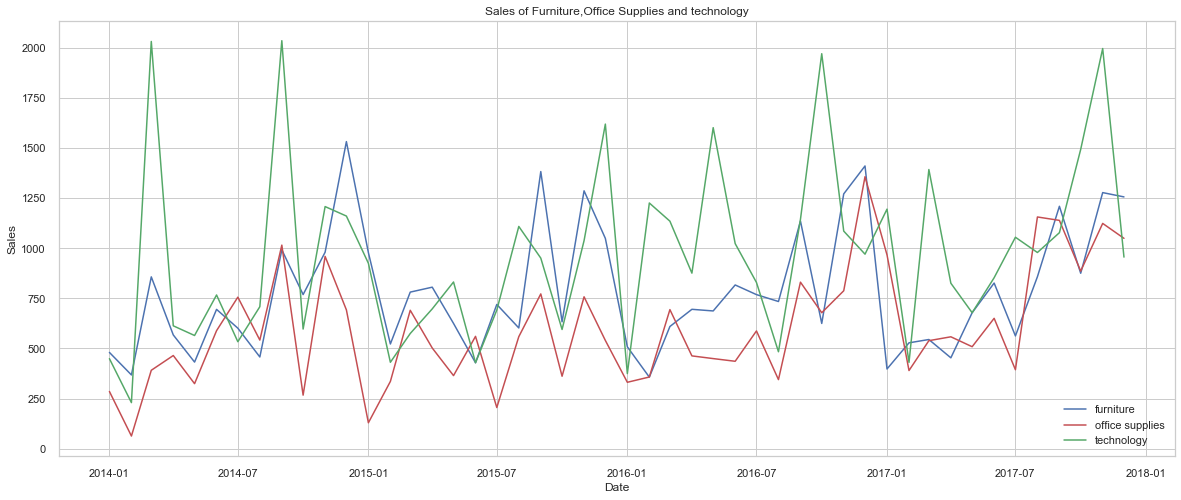

In [52]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['Furn_Sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['Office_Sales'], 'r-', label = 'office supplies')
plt.plot(store['Order Date'], store['Tech_Sales'], 'g-', label = 'technology')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture,Office Supplies and technology')
plt.legend();

We observe that sales of furniture and office supplies shared a similar seasonal pattern. Early of the year is the off season for both of the two categories. It seems summer time is quiet for office supplies too. in addition, average daily sales for furniture are higher than those of office supplies in most of the months. It is understandable, as the value of furniture should be much higher than those of office supplies. Occasionally, office supplies passed furniture on average daily sales. Let’s find out when was the first time office supplies’ sales surpassed those of furniture’s.

In [53]:
f['Furn_sales_2018']=f['Furn_Sales'].shift(-24)
o['Office_sales_2018']=o['Office_Sales'].shift(-24)
t['Tech_sales_2018']=t['Tech_Sales'].shift(-24)

In [54]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
y_tech = tech['Sales'].resample('MS').mean()

In [55]:
x_furniture=f.drop(['Furn_sales_2018','Order Date'],1)
x_office=o.drop(['Office_sales_2018','Order Date'],1)
x_tech=t.drop(['Tech_sales_2018','Order Date'],1)

In [56]:
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(x_furniture, y_furniture, test_size=0.3,train_size=.7,random_state=42)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(x_office, y_office, test_size=0.3,train_size=.7,random_state=42)
X_train_C, X_test_C, y_train_C, y_test_C= train_test_split(x_tech, y_tech, test_size=0.3,train_size=.7,random_state=42)

In [57]:
X_forecast_A =  f.tail(24).drop(['Furn_sales_2018','Order Date'], axis=1)
X_forecast_B =  o.tail(24).drop(['Office_sales_2018','Order Date'], axis=1)
X_forecast_C =  t.tail(24).drop(['Tech_sales_2018','Order Date'], axis=1)

In [58]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,accuracy_score,classification_report,cohen_kappa_score

# define regression function
def regression(X_train, X_test, y_train, y_test):
    Regressor = {
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=200),
        'ExtraTrees Regressor': ExtraTreesRegressor(n_estimators=200, min_samples_split=5),
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train)
    
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, clf.predict(X_test)):.2f}')
        print(f'MSE: {mean_squared_error(y_test, clf.predict(X_test)):.2f}')
        print()

In [59]:
regression(X_train_A, X_test_A, y_train_A, y_test_A)

Random Forest Regressor
R2: 0.96
MAE: 31.69
MSE: 1445.36

Gradient Boosting Regressor
R2: 0.98
MAE: 21.39
MSE: 661.71

ExtraTrees Regressor
R2: 0.98
MAE: 20.96
MSE: 778.67



In [60]:
regression(X_train_B, X_test_B, y_train_B, y_test_B)

Random Forest Regressor
R2: 0.98
MAE: 26.37
MSE: 1410.81

Gradient Boosting Regressor
R2: 0.97
MAE: 24.05
MSE: 1944.06

ExtraTrees Regressor
R2: 0.97
MAE: 29.94
MSE: 1731.98



In [61]:
regression(X_train_C, X_test_C, y_train_C, y_test_C)

Random Forest Regressor
R2: 0.94
MAE: 77.88
MSE: 12954.51

Gradient Boosting Regressor
R2: 0.99
MAE: 41.59
MSE: 3380.31

ExtraTrees Regressor
R2: 0.98
MAE: 47.76
MSE: 5672.01



In [62]:
# define prediction function
def prediction(X, y, X_forecast):
    model = ExtraTreesRegressor(n_estimators=20)
    model.fit(X, y)
    target = model.predict(X_forecast)
    return target

In [63]:
# calculate forecasted Sales for next 30 days
forecasted_A = prediction(x_furniture, y_furniture, X_forecast_A)
forecasted_B = prediction(x_office, y_office, X_forecast_B)
forecasted_C = prediction(x_tech, y_tech, X_forecast_C)

In [64]:
f=f.set_index('Order Date')
o=o.set_index('Order Date')
t=t.set_index('Order Date')

In [65]:
import datetime as dt
# define Code for next 12 month
last_date=store.iloc[-1]['Order Date']
modified_date1 =(last_date + dt.timedelta(days=30))
modified_date =( modified_date1 + dt.timedelta(days=30))
new_date = pd.date_range(last_date,periods=24,freq='M')

# assign pd.dfFrame to newly defined Code
forecasted_0 = pd.DataFrame(forecasted_A, columns=['Furn_Sales'], index=new_date)
forecasted_1 = pd.DataFrame(forecasted_B, columns=['Office_Sales'], index=new_date)
forecasted_2 = pd.DataFrame(forecasted_C, columns=['Tech_Sales'], index=new_date)

In [66]:
# combine historical Sales and predicted Sales
a = pd.concat([f[['Furn_Sales']],forecasted_0],join='outer',axis=0)
b = pd.concat([o[['Office_Sales']],forecasted_1],join='outer',axis=0)
c = pd.concat([t[['Tech_Sales']],forecasted_2],join='outer',axis=0)

In [67]:
a['order_year']=a.index.year
b['order_year']=b.index.year
c['order_year']=c.index.year

Text(0.5, 1.0, 'Year wise Total Sales')

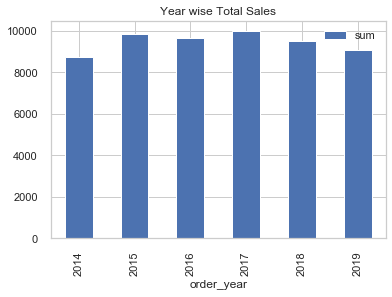

In [68]:
#Sales per year
a.groupby('order_year')['Furn_Sales'].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales')

Text(0.5, 1.0, 'Year wise Total Sales')

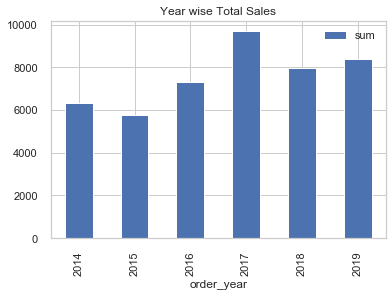

In [69]:
#Sales per year
b.groupby('order_year')['Office_Sales'].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales')

Text(0.5, 1.0, 'Year wise Total Sales')

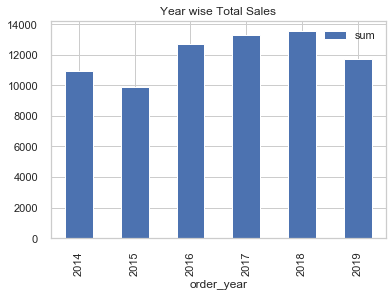

In [70]:
#Sales per year
c.groupby('order_year')['Tech_Sales'].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales')

In [71]:
d=pd.concat((a,b,c),axis=1,join='outer')
d.isnull().sum()

Furn_Sales      0
order_year      0
Office_Sales    0
order_year      0
Tech_Sales      0
order_year      0
dtype: int64

In [72]:
d=d.drop(columns=['order_year','order_year'])
d.tail()

,Furn_Sales,Office_Sales,Tech_Sales
2019-07-31,857.881889,1156.148154,978.842333
2019-08-31,1209.508583,1139.137250,1077.704120
2019-09-30,875.362728,886.045846,1493.439227
2019-10-31,1277.817759,1124.012036,1996.750920
2019-11-30,1256.298672,1049.549724,955.865652


In [73]:
d.to_csv('Forecasted_sales.csv')

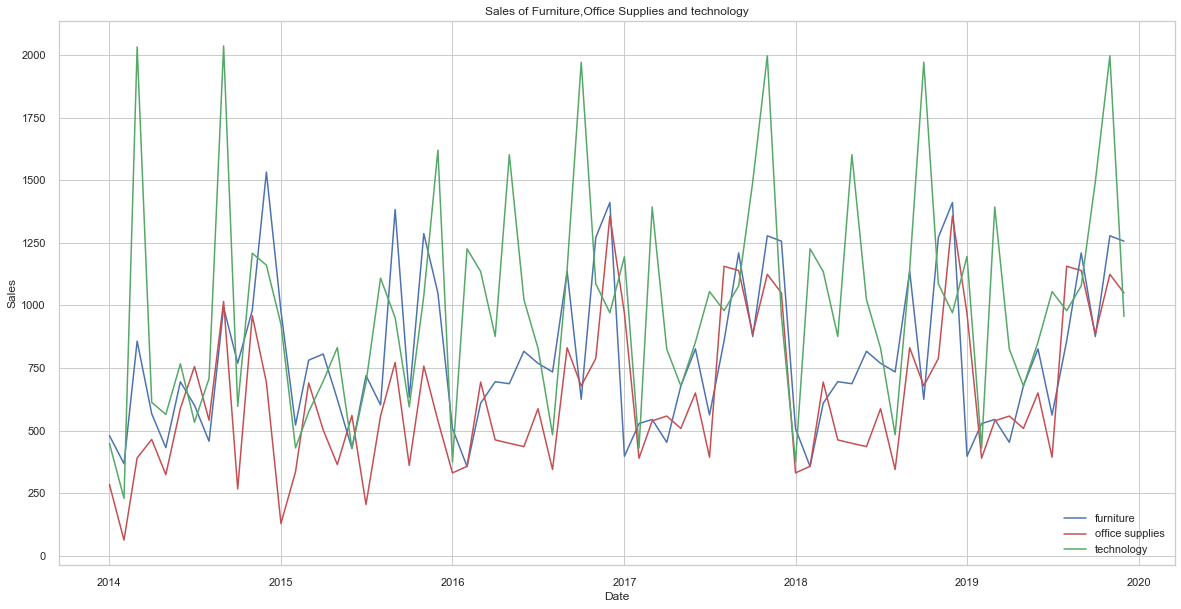

In [74]:
plt.figure(figsize=(20, 10))
plt.plot(d.index, d['Furn_Sales'], 'b-', label = 'furniture')
plt.plot(d.index, d['Office_Sales'], 'r-', label = 'office supplies')
plt.plot(d.index, d['Tech_Sales'], 'g-', label = 'technology')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture,Office Supplies and technology')
plt.legend();

In [75]:
mask=(f.index<'2017-01-01')
df2=f.loc[mask]
df2.tail()

,Furn_Sales,Furn_Cost,Furn_Profit %,Furn_Shipment_Duration,Furn_Quantity,Furn_sales_2018
Order Date,,,,,,
2016-08-01,734.307782,763.375176,1.043860,7.058824,6.764706,NaN
2016-09-01,1135.953371,1106.678267,52.139606,14.000000,11.833333,NaN
2016-10-01,624.872474,632.486158,33.733853,9.526316,9.842105,NaN
2016-11-01,1271.345152,1238.552800,43.968957,13.160000,12.720000,NaN
2016-12-01,1410.719808,1301.924750,66.167732,13.000000,13.192308,NaN


In [76]:
df2=df.copy()
a=df2.select_dtypes(include='object')
a=a.drop(['Order ID','Customer ID','Customer Name'],1)
a.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

In [77]:
a['Ship Mode']=LabelEncoder().fit_transform(a['Ship Mode'])
a['Segment']=LabelEncoder().fit_transform(a['Segment'])
a['City']=LabelEncoder().fit_transform(a['City'])
a['State']=LabelEncoder().fit_transform(a['State'])
a['Region']=LabelEncoder().fit_transform(a['Region'])
a['Product_ID']=LabelEncoder().fit_transform(a['Product ID'])
a['Category']=LabelEncoder().fit_transform(a['Category'])
a['Sub-Category']=LabelEncoder().fit_transform(a['Sub-Category'])
a['Product_Name']=LabelEncoder().fit_transform(a['Product Name'])

In [78]:
df3=pd.concat([a,df2.select_dtypes(exclude='object')],join='outer',axis=1)
df3=df3.drop(['Order Date','Ship Date','Category','Product ID','Product Name','Product_ID','Product_Name'],1)

In [79]:
df3.sample(5)

,Ship Mode,Segment,City,State,Region,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %,Target,Shipment_Duration,order_year
1389,1,2,458,9,2,13,484.830,3,0.0,126.0558,358.7742,35.135135,1,0,2016
8933,3,1,177,47,0,9,16.740,2,0.0,4.3524,12.3876,35.135135,1,5,2016
7195,3,2,452,45,3,9,19.540,2,0.0,7.2298,12.3102,58.730159,1,4,2016
414,3,1,452,45,3,12,139.860,7,0.0,65.7342,74.1258,88.679245,1,4,2017
4786,3,0,92,4,3,2,4.224,3,0.2,0.4752,3.7488,12.676056,1,5,2015


#### Logistic Regression

In [80]:
y=df3['Target']
X=df3.drop('Target',1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4) 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression()
mod=mod.fit(X_train,y_train)

In [81]:
y_pred=mod.predict(X_test)
print('Y_predict:',y_pred)

Y_predict: [1 1 1 ... 1 0 1]


In [82]:
print('train score:',mod.score(X_train,y_train))
print('test score:',mod.score(X_test,y_test))

train score: 0.9946631087391594
test score: 0.9939969984992496


In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       783
           1       0.99      1.00      1.00      3215

    accuracy                           0.99      3998
   macro avg       1.00      0.98      0.99      3998
weighted avg       0.99      0.99      0.99      3998



In [85]:
accuracy_score(y_test,y_pred)

0.9939969984992496

In [86]:
roc_auc_score(y_test,y_pred)

0.9846743295019157

#### Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
cl2=DecisionTreeClassifier(criterion='entropy')
cl2.fit(X_train,y_train)
y_predicts=cl2.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_predicts))
print(classification_report(y_test,y_predicts))
print(roc_auc_score(y_test,y_predicts))

Accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00      3215

    accuracy                           1.00      3998
   macro avg       1.00      1.00      1.00      3998
weighted avg       1.00      1.00      1.00      3998

1.0


#### Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=None,min_samples_split=2,
                         min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features='auto',
                         max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,
                         bootstrap=True,oob_score=False,n_jobs=None,random_state=42,verbose=0,
                         warm_start=False,class_weight=None)
b.fit(X_train,y_train)
y_predicts=b.predict(X_test)
print(classification_report(y_test,y_predicts))
print('Accuracy score:',accuracy_score(y_test,y_predicts))
print('Roc AUC score:',roc_auc_score(y_test,y_predicts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00      3215

    accuracy                           1.00      3998
   macro avg       1.00      1.00      1.00      3998
weighted avg       1.00      1.00      1.00      3998

Accuracy score: 1.0
Roc AUC score: 1.0


#### Gradient Descent

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(random_state=42,learning_rate=0.8,n_estimators=50)
clf1.fit(X_train, y_train)
preds = clf1.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, preds))
print('Confusion Matrix:',confusion_matrix(y_test, preds))
print(classification_report(y_test,preds))
print(roc_auc_score(y_test,preds))

Accuracy score: 1.0
Confusion Matrix: [[ 783    0]
 [   0 3215]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00      3215

    accuracy                           1.00      3998
   macro avg       1.00      1.00      1.00      3998
weighted avg       1.00      1.00      1.00      3998

1.0


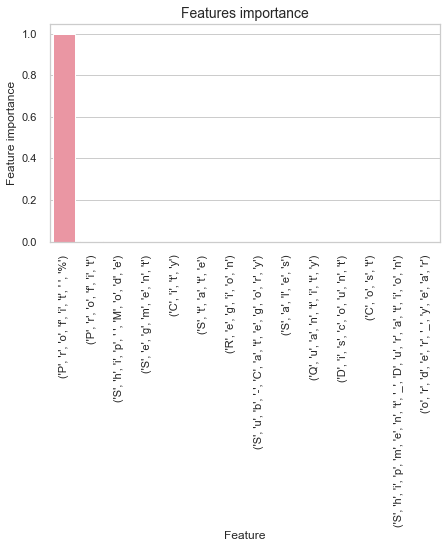

In [90]:
tmp = pd.DataFrame({'Feature': X, 'Feature importance': clf1.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

#### KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
cl = KNeighborsClassifier(n_neighbors=500)
cl.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=500, p=2,
                     weights='uniform')

In [92]:
y_pred=cl.predict(X_test)

In [93]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print('Confusion Matrix',confusion_matrix(y_test, y_pred))
print('Classification Report',classification_report(y_test, y_pred))
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Roc AUC score',roc_auc_score(y_test,y_pred))

Confusion Matrix [[ 365  418]
 [   0 3215]]
Classification Report               precision    recall  f1-score   support

           0       1.00      0.47      0.64       783
           1       0.88      1.00      0.94      3215

    accuracy                           0.90      3998
   macro avg       0.94      0.73      0.79      3998
weighted avg       0.91      0.90      0.88      3998

Accuracy Score 0.8954477238619309
Roc AUC score 0.7330779054916986


In [94]:
df3.Target.value_counts()

1    8058
0    1936
Name: Target, dtype: int64

#### Bagging Classifier

In [95]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [96]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
    RandomForestClassifier(random_state=0, n_jobs=-1,
                           n_estimators=100, max_depth=3),
    DecisionTreeClassifier(criterion='gini',random_state=0),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_features=2, 
                               max_depth=2, random_state=0)
]

In [97]:
from vecstack import stacking
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,
                            mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=roc_auc_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,
                          verbose=1)

task:         [classification]
n_classes:    [2]
metric:       [roc_auc_score]
mode:         [oof_pred_bag]
n_models:     [6]

model  0:     [KNeighborsClassifier]
    ----
    MEAN:     [0.87169971] + [0.01572030]
    FULL:     [0.87172212]

model  1:     [RandomForestClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]

model  2:     [DecisionTreeClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]

model  3:     [XGBClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]

model  4:     [AdaBoostClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]

model  5:     [GradientBoostingClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]



In [98]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,
                            mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,
                          verbose=1)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [6]

model  0:     [KNeighborsClassifier]
    ----
    MEAN:     [0.94596141] + [0.00706125]
    FULL:     [0.94596398]

model  1:     [RandomForestClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]

model  2:     [DecisionTreeClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]

model  3:     [XGBClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]

model  4:     [AdaBoostClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]

model  5:     [GradientBoostingClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]



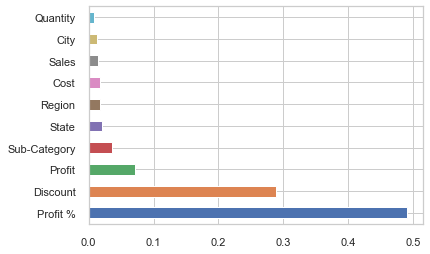

In [99]:
from sklearn.ensemble import ExtraTreesClassifier 
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)	### where X and y are the variables used before train test split print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers #plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [100]:
from vecstack import stacking
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,
                            mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=cohen_kappa_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,
                          verbose=1)

task:         [classification]
n_classes:    [2]
metric:       [cohen_kappa_score]
mode:         [oof_pred_bag]
n_models:     [6]

model  0:     [KNeighborsClassifier]
    ----
    MEAN:     [0.81011722] + [0.02626620]
    FULL:     [0.81038388]

model  1:     [RandomForestClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]

model  2:     [DecisionTreeClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]

model  3:     [XGBClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]

model  4:     [AdaBoostClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]

model  5:     [GradientBoostingClassifier]
    ----
    MEAN:     [1.00000000] + [0.00000000]
    FULL:     [1.00000000]



In [101]:
pp.ProfileReport(df)

In [102]:
from sklearn import metrics

In [105]:
seed=0
dt=DecisionTreeClassifier(random_state=seed)
rf=RandomForestClassifier(random_state=seed)
lr=LogisticRegression(random_state=seed)
adb=AdaBoostClassifier()
bgc=BaggingClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier(random_state=seed)

models=[dt,rf,adb,bgc,gbc,xgb]

def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    
    for model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
        p_score=metrics.precision_score(y_test,y_pred)
        r_score=metrics.recall_score(y_test,y_pred)
        f1_score=metrics.f1_score(y_test,y_pred)
        fp,tp,th=metrics.roc_curve(y_test,y_pred)
        chscore=cohen_kappa_score(y_test,y_pred)
        
        df.iloc[i,'Model Name']=model._class_._name_
        df.iloc[i,"precision"]=round(p_score,2)
        df.iloc[i,"Recall"]=round(r_score,2)
        df.iloc[i,"Train_accuracy"]=round(train_accuracy,2)
        df.iloc[i,"Test_accuracy"]=round(test_accuracy,2)
        df.iloc[i,'F1_score']=round(f1_score,2)
        df.iloc[i,"AUC"]=metrics.auc(fp,tp)
        df.iloc[i,"Cohen_Kappa Score"]=round(chscore,2)
        
        i+=1
        
    df.sort_values(by=["F1_score"],ascending=False,inplace=True)
    return (df)   

In [106]:
score_model(X_train,y_train,X_test,y_test)

IndexError: single positional indexer is out-of-bounds